### Codio Activity 22.6: Using a Neural Net for Non-Concentric Data

**Expected Time = 60 minutes** 

**Total Points = 20** 

This activity focuses on using a neural network to classify a dataset that does not have an obvious linear boundary.  An important idea about the neural net is its ability to solve such problems with high accuracy.  The dataset you will use is created using Scikit-Learn, and is meant to mimic that from the videos.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings

from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


warnings.filterwarnings('ignore')

2024-12-03 16:54:45.215388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### The Data

Below, a dataset is manufactured to have four centers, and these are then combined to form a binary classification problem.  The data is created and visualized below using the `make_blobs` function.

In [6]:
X, y = make_blobs([50, 50, 50, 50], centers = [[0, 5], [5, 0], [5, 5], [0, 0]],
                 random_state=42)

In [7]:
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

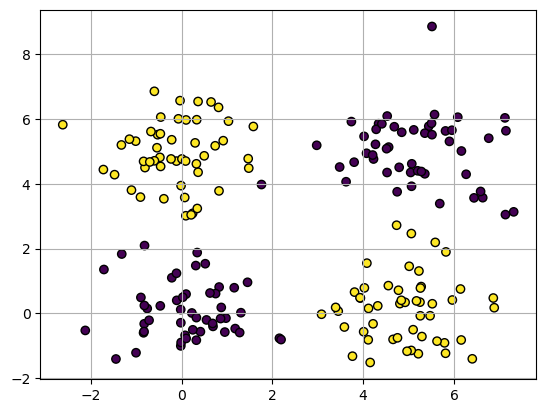

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'black')
plt.grid();

[Back to top](#-Index)

### Problem 1

#### The Network Architecture

**10 Points**

First, use `keras` to create a `Sequential` model named `model` with a fully connected layer with 100 neurons and a `relu` activation function. The output layer of this model should have one neuron and a `sigmoid` activation function.

Next, compile this model with the `bce` loss and with `metrics` equal to `acc`.

Finally, use the `fit()` method on `model` for training using the `X` and `y` data. For this step, use 100 epochs, set `verbose=0` to disables the output of training progress, and use `validation_split=0.2` to ansure 20% of the data is used for validation. Assign the trained model to the `history` variable below.

In [10]:
### GRADED
model = Sequential([Dense(100, activation = 'relu'), 
                   Dense(1, activation = 'sigmoid')])
model.compile(loss = 'bce', metrics = ['acc'])
history = model.fit(X, y, epochs = 100, verbose = 0, validation_split = 0.2)

### ANSWER CHECK
print(history.history['acc'][-1])

0.9750000238418579


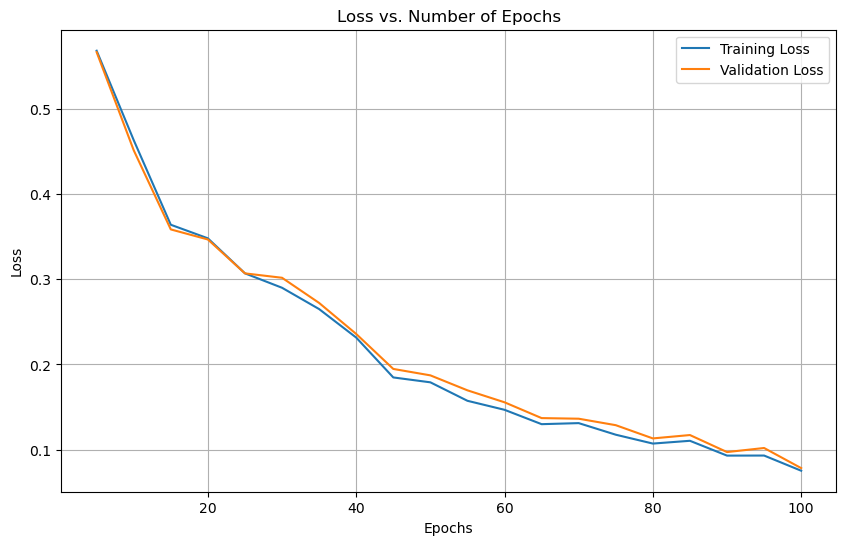

In [16]:
# Define your model architecture
def create_model():
    model = Sequential([
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare to store losses
epochs_range = range(5, 105, 5)
training_losses = []
validation_losses = []

# Loop through increments of 5 epochs
for epochs in epochs_range:
    model = create_model()  # Create a fresh model for each iteration
    history = model.fit(X, y, epochs=epochs, verbose=0, validation_split=0.2)
    training_losses.append(history.history['loss'][-1])  # Last training loss
    validation_losses.append(history.history['val_loss'][-1])  # Last validation loss

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, training_losses, label='Training Loss')
plt.plot(epochs_range, validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
plt.legend()
plt.grid()
plt.show()

[Back to top](#-Index)

### Problem 2

#### How many epochs are necessary

**10 Points**

An important consideration is not wasting energy in over training your data.  Create a visualization of the loss function. Can you identify a point of diminishing returns?   

Assign your answer as an integer for what you believe is an optimal number of training  `epochs`. 

In [18]:
### GRADED
epochs = 80

### ANSWER CHECK
print(epochs)

80
